##### ARIMA模型是线性回归模型的子集，这些模型试图使用目标变量的过去观察值来预测其未来值。ARIMA模型的一个关键方面是，在其基本形式中，它们不考虑外生变量。相反，预测纯粹是使用目标变量的过去值（或根据这些过去值制作的特征）进行的。
## ARIMA代表自回归综合移动平均线。让我们遍历ARIMA模型的每一部分，以便我们完全理解它。

## 读取数据

In [45]:
import numpy as np
import pandas as pd

table = pd.read_csv("/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/数据库文件/tushare股票数据/历史数据.csv")

In [46]:
table.columns

Index(['date', 'open', 'high', 'close', 'low', 'volume', 'price_change',
       'p_change', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20',
       'codenumber'],
      dtype='object')

In [47]:
high = table[table.codenumber=="688068"].high.astype(float).to_numpy()

In [56]:
close = table[table.codenumber=="688068"].close.astype(float).to_numpy()

In [57]:
high.shape,close.shape

((1368,), (1368,))

In [353]:
table.codenumber

0          688068
1          688068
2          688068
3          688068
4          688068
            ...  
4448628    600891
4448629    600891
4448630    600891
4448631    600891
4448632    600891
Name: codenumber, Length: 4448633, dtype: object

## 判断是否有空

In [50]:
def testnan(X):
    return (~X.any(axis=0)).any()

In [51]:
testnan(high)

False

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## 先理解什么是差分
差分，一般在大数据里用在以时间为统计维度的分析中，其实就是下一个数值 ，减去上一个数值 。

当间距相等时，用下一个数值，减去上一个数值 ，就叫“一阶差分”，做两次相同的动作，即再在一阶差分的基础上用后一个数值再减上一个数值一次，就叫“二阶差分"。

间距相等定义：即下图中要么1,2,3,4,5,6,7,8,9,10行后一个向前一个相减；要么2,4,6,8,10或1,3,5,7,9行后一个向前一个相减；但不要1,5,6,10这样不规律跳动着减，就是间距相等的定义（当然还有其它组合，如3,6,9，但无论怎样，之间间距必须相等）。

差分形像点理解，可以看下图
<img src = "https://pic2.zhimg.com/v2-400d502f0aa113cbc1905084a9440b1d_r.jpg">
如果数值图不好理解，划个折线图，会看得更清晰。可以看得出来，做完一阶差分之后，除了个别地方，数值之间的跳动并没有之前明显。
<img src = "https://pic3.zhimg.com/80/v2-1fc4247a3d6e90d13a22268950221f32_720w.jpg">
<img src = "https://pic4.zhimg.com/80/v2-d1bc8dce379f2a42282fcb2f42ded0bb_720w.jpg">
因此，差分的作用是减轻数据之间的不规律波动，使其波动曲线更平稳


当然，差分也可以用在其它地方，例如其它人常说的用在离散值上面，但一谈到这些专业述语，就会使解释更复杂，也更难明白，所以不再举其它例子解释了。不过其实也是一样的，无论什么场景，都是用后一个值减前一个值，就叫差分。另外，某些情况下，前一个值减后一个值，也可以叫差分，但这种用法不常见。

## ARIMA 模型的限制范围：
## 一 平稳性:
### 平稳性就是要求经由样本时间序列所得到的拟合曲线在未来的一段时间内仍然能顺着现有的形态“惯性”的延续下去
### 平稳性要求高，要求序列的均值和方差不发生明显的变化
### 如果两个周期发生了明显的改变，就无法使用了
## 二 严平稳：
### 2.1 严平稳：表示分布不随时间改变而改变（如：白噪声（正太），无论怎么取，都是均值0，方差为1）
### 2.2 弱平稳：期望与相关系数（依赖性）不变，未来某时刻的t的值Xt就要依赖于它过去的信息，所以需要依赖性。--实际情况都是弱平稳（天气，降雨，股票）

# AR 自回归

def AR(B,lag):
    n = B.shape[0]-lag 
    ylag = np.r_[np.ones(n),B[n:]]
    return ylag*B

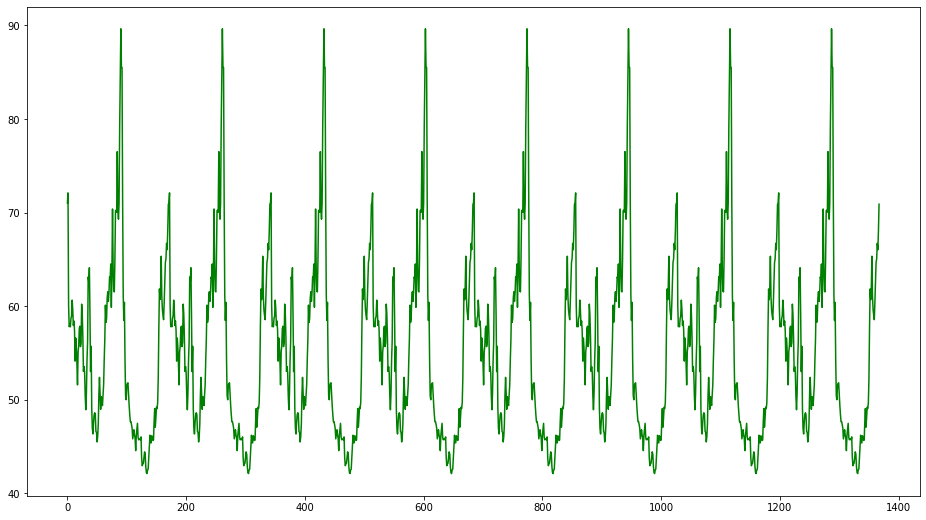

In [124]:
close
plt.figure(figsize=(16,9))
plt.plot(close,c='g')

## numpy 实现连续差分 np.ediff1d()

In [ ]:
xdiff1 = np.ediff1d(close)

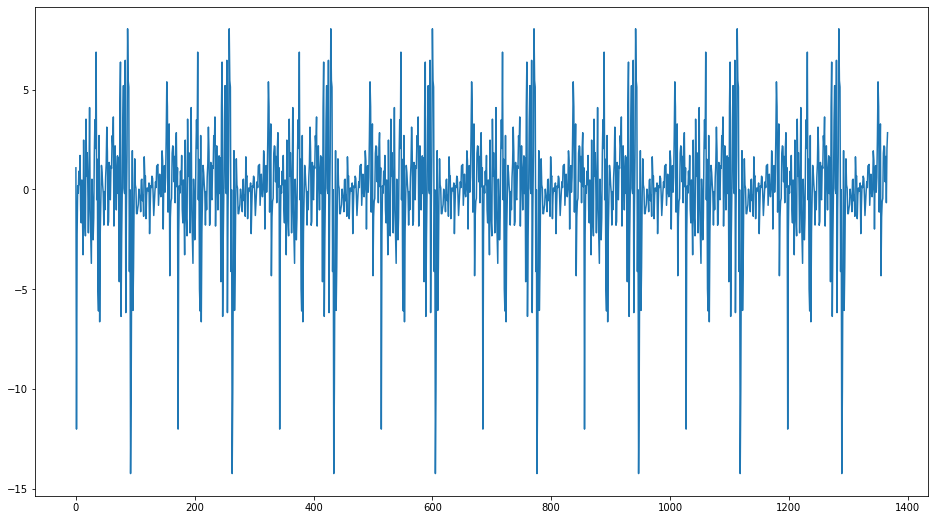

In [165]:
plt.figure(figsize=(16,9))
plt.plot(xdiff1)

## numpy 实现一阶差分 np.diff()

(1338,) (1124,)


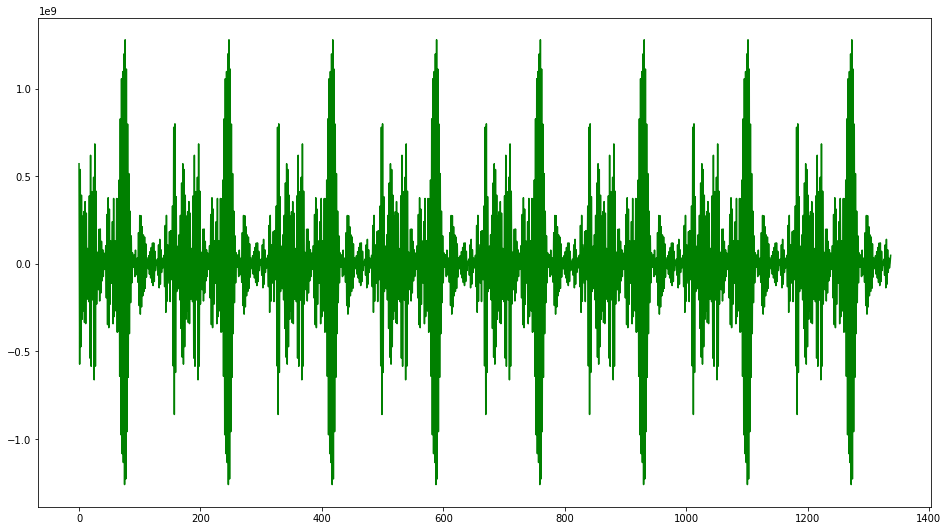

In [190]:
xdiff1 = np.diff(close,n=30)
print(xdiff1.shape,x.shape)
plt.figure(figsize=(16,9))
plt.plot(xdiff1,c='g')
#plt.plot(close,c='y')

## 二阶差分是在一阶差分基础上再做一次差分

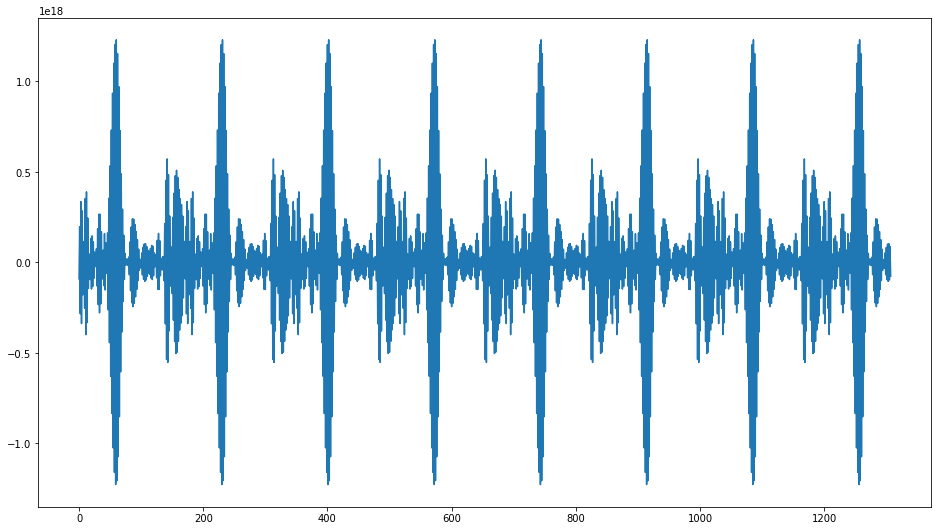

In [354]:
plt.figure(figsize=(16,9))
x = close
for i in range(2):
    x = np.diff(x,30)
plt.plot(x)

# AR 模型
###  p阶自回归过程的公式定义
###  $$ y_t = \mu + \sum_{i=1}^{p}\gamma_{i}y_{t-i} + \epsilon_t $$ 
###  $ y_t = 当前值 $
###  $ \mu = 常数项 $
###  $ p是阶数 「时间间隔」$
###  $ \gamma是自相关系数 (如果自相关系数小于0.5则不适用)$
###  $ \epsilon_t 是误差 $

# 自相关系数
<img src = "https://img-blog.csdn.net/20180427094041936?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3F1c2hvdXNoaTA1OTQ=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70">

# 自相关系数

In [365]:

def auto_corr(x,n=1,p=1):
    xn_h = x[n:]
    xnh = x[:-n]
    mu = x.mean()
    sigm = ((x-mu)**2).dot(np.ones_like(x))
    return ((xn_h-mu)*(xnh-mu)/sigm).sum() 

auto_corr(close,1,1)

0.9517987604737206

# 线性回归

In [340]:
def equation_regression(X,Y,predict):
        predict = np.array(predict)
        try:
            xm,xn = X.shape
            ym,yn = Y.shape
        except Exception:
            xm,xn = X.shape
            Y = Y[:,None]
        finally:
            newX = np.c_[np.ones(xm),X]
            fit = np.dot(np.dot(np.linalg.pinv(np.dot(newX.T,newX)),newX.T),Y)
            predictX = np.c_[np.ones(predict.shape[0]),predict].dot(fit)
            return fit,predictX

In [366]:
closelog = np.log(close)

In [356]:
trianx = close[:1000][:,None]
testx = close[1000:][:,None]


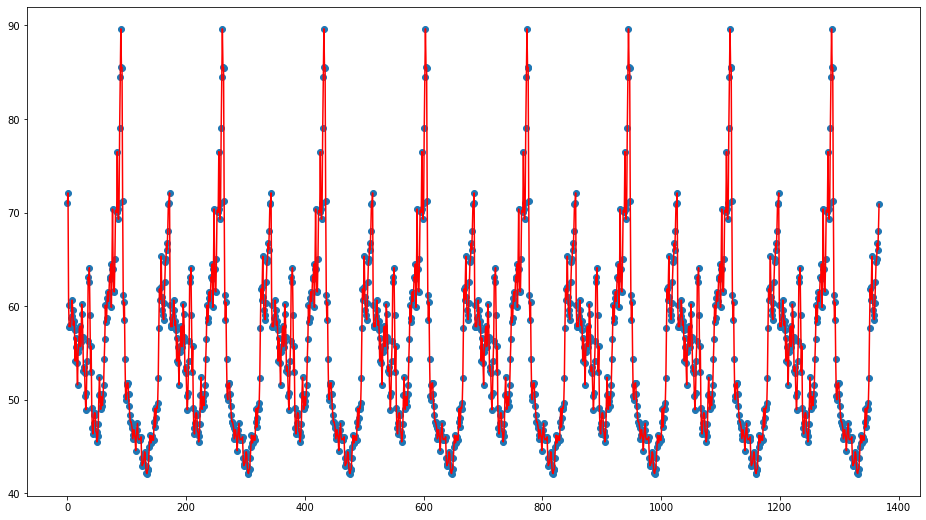

In [357]:
plt.figure(figsize=(16,9))
plt.scatter(range(close.shape[0]),close)
plt.plot(equation_regression(trianx,trianx,close)[1],c='r')

# 梯度下降实现
<img src="/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/im/B6DC59D9-4F7D-4731-B8F5-A14543810793.png")

array([ 34.57,  -0.15,  -7.54, ..., -11.33,  15.21, -15.48])

In [358]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(np.diff(close,5), lags=1))

差分序列的白噪声检验结果为： (array([823.9384213]), array([3.36908741e-181]))


In [361]:
def gradient_descent_regression(x,y,maxloop=0,aphla=0.00001,epslon=0):
    m,n = x.shape
    theta = np.ones_like(x[0])
    mu = x.mean()
    for i in range(maxloop):
        pass



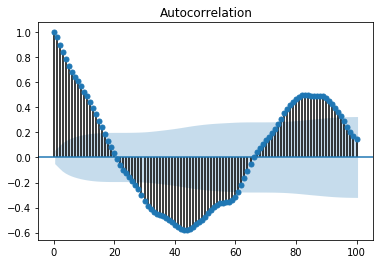

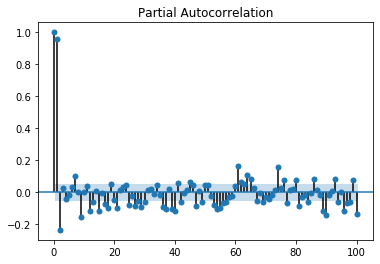

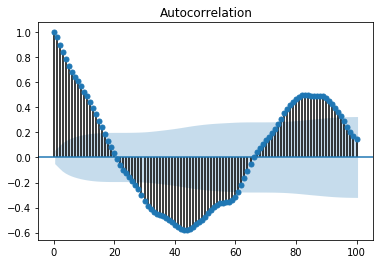

In [363]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(closelog,lags=100)
plot_acf(closelog,lags=100)

# MA 移动平均线

<img src="/Users/manmanzhang/Library/Mobile Documents/com~apple~CloudDocs/MyProject/InferenceSystem/src/I5_algorithm/im/36ECBDFA-F180-47DD-AE90-806D8DEC86B9.png">

In [376]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(closelog,order=(3,1,0)).fit()        # 传入参数，构建并拟合模型
predict_data=model.predict(1,1500)                # 拟合+预测0~150数据
forecast=model.forecast(21)                      # 预测未来21天数据

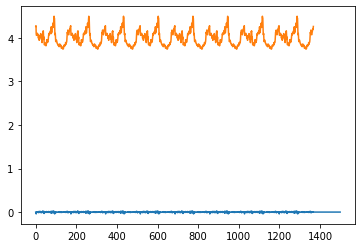

In [377]:
plt.plot(predict_data)
plt.plot(closelog)

## https://www.statsmodels.org/stable/examples/notebooks/generated/robust_models_0.html

[4.21812025]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              3491.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):                    5.21e-79
Time:                        23:15:32   Log-Likelihood:                         -283.27
No. Observations:                 100   AIC:                                      568.5
Df Residuals:                      99   BIC:                                      571.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

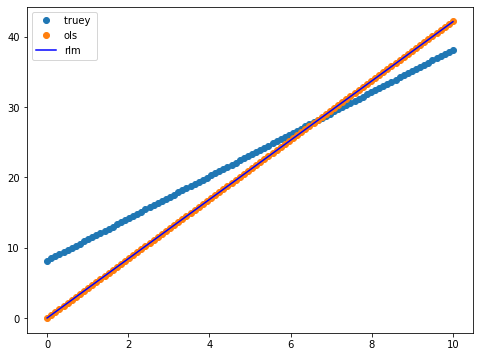

In [291]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
x = np.linspace(0,10,100)
y = 3*x + np.random.randn()+ 10

# Fit and summarize OLS model
res = sm.OLS(y,x).fit()
print(res.params)
print(res.summary())
# 稳健回归
resrlm = sm.RLM(y, x).fit()

# 画图
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="truey ")
ax.plot(x, res.predict(), 'o', label="ols")  # res2.predict(X2) == res2.predict()
ax.plot(x, resrlm.predict(), 'b-', label="rlm")# resrlm2.predict(X2) == resrlm2.predict()
legend = ax.legend(loc="best")
plt.show()
# 图保存
plt.savefig( 'image.jpg')



In [292]:
#  线性模型
import statsmodels.api as sm
import numpy as np
x = np.linspace(0,10,100)
y = 3*x + np.random.randn()+ 10
# Fit and summarize OLS model
X = sm.add_constant(x)
mod = sm.OLS(y,X)
result = mod.fit()
print('Parameters: ', result .params)
print('Standard errors: ', result .bse)
print('Predicted values: ', result .predict())
print(result.summary())


# 预测数据
print(result.predict(X[:5]))


Parameters:  [8.23856218 3.        ]
Standard errors:  [2.14255661e-15 3.70168100e-16]
Predicted values:  [ 8.23856218  8.54159248  8.84462278  9.14765309  9.45068339  9.75371369
 10.056744   10.3597743  10.6628046  10.96583491 11.26886521 11.57189551
 11.87492581 12.17795612 12.48098642 12.78401672 13.08704703 13.39007733
 13.69310763 13.99613794 14.29916824 14.60219854 14.90522884 15.20825915
 15.51128945 15.81431975 16.11735006 16.42038036 16.72341066 17.02644097
 17.32947127 17.63250157 17.93553188 18.23856218 18.54159248 18.84462278
 19.14765309 19.45068339 19.75371369 20.056744   20.3597743  20.6628046
 20.96583491 21.26886521 21.57189551 21.87492581 22.17795612 22.48098642
 22.78401672 23.08704703 23.39007733 23.69310763 23.99613794 24.29916824
 24.60219854 24.90522884 25.20825915 25.51128945 25.81431975 26.11735006
 26.42038036 26.72341066 27.02644097 27.32947127 27.63250157 27.93553188
 28.23856218 28.54159248 28.84462278 29.14765309 29.45068339 29.75371369
 30.056744   30.359

In [293]:
# 广义线性模型——GLM
import statsmodels.formula.api as smf
star98 = sm.datasets.star98.load_pandas().data
formula = 'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + \
           PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF'
dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']].copy()
endog = dta['NABOVE'] / (dta['NABOVE'] + dta.pop('NBELOW'))
del dta['NABOVE']
dta['SUCCESS'] = endog

mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()
mod1.summary()
mod1.predict(dta)



0      0.578461
1      0.769802
2      0.449346
3      0.683891
4      0.247756
         ...   
298    0.320249
299    0.395530
300    0.402495
301    0.403327
302    0.285034
Length: 303, dtype: float64